# Trayectorias cuanticas: Detección Homodina Balanceada.

#    1. ¿Por qué se usa la detección homodina?
En la detección de estados comprimidos, queremos medir la varianza de una cuadratura del campo electromagnético. Una cuadratura es una de las dos componentes (en fase y en cuadratura) de la amplitud del campo óptico, análogas a la posición y el momento en mecánica cuántica.

Para lograr esta medición, necesitamos un esquema que sea sensible a la fase del campo y que pueda amplificar señales débiles sin añadir demasiado ruido. Aquí entra la detección homodina.

    2. ¿Qué es el oscilador local (OL)?
El oscilador local es una fuente de referencia que interfiere con la luz del emisor para extraer información de la cuadratura. Tiene las siguientes características:

Misma frecuencia que el haz de excitación: 

Mayor intensidad que el haz de excitación: Esto asegura que el campo del oscilador domina la interferencia.
Proviene del mismo láser que el haz de excitación: Así se garantiza la coherencia entre ambos.
Además, el oscilador local tiene un retraso de fase 

    3. División de haz y mezcla de modos
Para combinar el haz del emisor con el oscilador local, se usa un divisor de haz (DH). Este es un dispositivo óptico que divide un haz incidente en dos partes con:
    
    1. Reflectancia R: Fracción de luz reflejada.
    2. Transmitancia T: Fracción de luz transmitida.
    3. Condición de conservación de energía: R+T=1.
Definimos los operadores de aniquilación para los modos del emisor 


Después de pasar por el divisor de haz, los nuevos modos emergentes son:
 ![image.png](attachment:image.png)
 Los detectores D1 y D2 miden la intensidad de los modos emergentes del divisor de haz (DH), es decir, los modos $c^\hat{c}c^ y d^\hat{d}d^$.

Caso de deteccion homodina balanceada
![image-2.png](attachment:image-2.png)


# Detección homodina

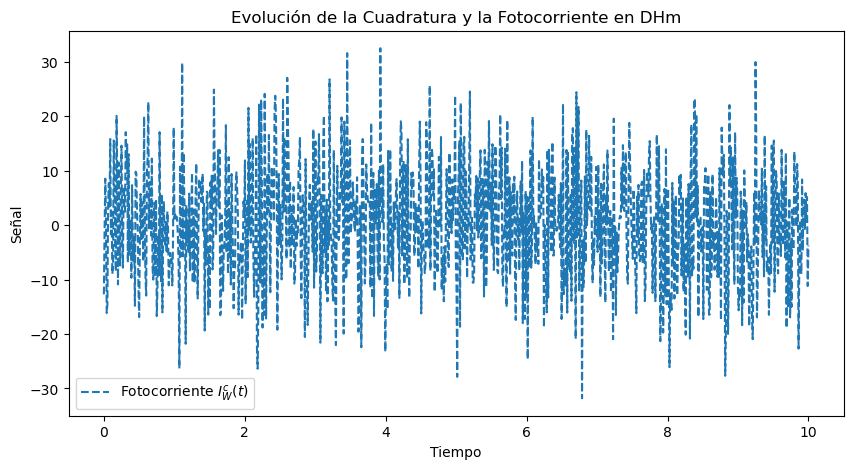

In [121]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parámetros
gamma = 1.0       # Tasa de detección
phi = 0.0         # Fase del oscilador local
dt = 0.01         # Paso de tiempo
t_max = 10.0      # Tiempo total de simulación
Omega = 1      # Frecuencia de Rabi
steps = int(t_max / dt)
Delta =0


# Operadores cuánticos
sm = qt.destroy(2)   # Operador de aniquilación (sigma_-)
sp = sm.dag()        # Operador de creación (sigma_+)
sigma_phi = (sp * np.exp(1j * phi) + sm * np.exp(-1j * phi)) / 2  # Operador de cuadratura

#
Kg = qt.basis(2, 0)  # estado base |g⟩
Ke = qt.basis(2, 1)  # estado excitado |e⟩
sigma_z = Ke * Ke.dag() - Kg * Kg.dag()
# Hamiltoniano
H = 0.5 * Delta * sigma_z+0.5+0.5 * Omega * (sm + sp)  # Hamiltoniano con frecuencia de Rabi

# Estado inicial en superposición
psi_t = (qt.basis(2, 0) + qt.basis(2, 1)).unit()

# Simulación estocástica
  # Incrementos de Wiener
expect_X = []
I_W = []

def evolve_state(psi, dW_i):
    # Valores esperados
    sigma_plus_expect = qt.expect(sp, psi)
    sigma_minus_expect = qt.expect(sm, psi)
    sigma_phi_expect = qt.expect(sigma_phi, psi)
    
    # Fotocorriente I_W^c(t)
    I_W_t = gamma * (sigma_plus_expect + np.exp(-2j * phi) * sigma_minus_expect) + np.exp(-1j * phi) * np.sqrt(gamma) * (dW_i / dt)
    
    # Evolución del estado
    dPsi = (-1j * H * psi + I_W_t * sm * psi) * dt
    return (psi + dPsi).unit(), I_W_t

IWsum = []  # Inicia la lista para almacenar las trayectorias
expect_Xsum=[]
for tj in range(500):  # Número de trayectorias
    dW = np.sqrt(dt) * np.random.randn(steps)
    I_W = []  # Lista para almacenar los resultados de cada trayectoria
    expect_X=[]
    psi_t = (qt.basis(2, 0) + qt.basis(2, 1)).unit()
    for i in range(steps):  # Número de pasos
        psi_t, I_W_t = evolve_state(psi_t, dW[i])  # Evolución del estado y cálculo de I_W_t
        expect_X.append(qt.expect(sigma_phi, psi_t))  # Esperanza de X
        I_W.append(I_W_t)  # Almacena el valor de I_W_t
    expect_Xsum.append(expect_X)
    IWsum.append(I_W)  # Añade la trayectoria calculada a IWsum

IWavg = np.mean(IWsum, axis=0)  # Promedio de las trayectorias
expect_Xavg =np.mean(expect_Xsum, axis=0)

# Graficar la evolución de la cuadratura y la fotocorriente
plt.figure(figsize=(10, 5))

plt.plot(np.linspace(0, t_max, steps), np.real(I_W), label="Fotocorriente $I_W^c(t)$", linestyle='dashed')
plt.xlabel("Tiempo")
plt.ylabel("Señal")
plt.title("Evolución de la Cuadratura y la Fotocorriente en DHm")
plt.legend()
plt.show()

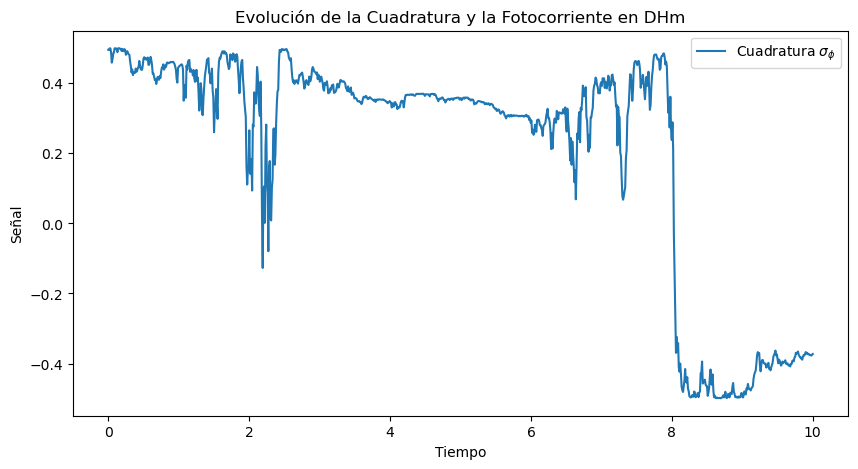

In [122]:
plt.figure(figsize=(10, 5))

plt.plot(np.linspace(0, t_max, steps), expect_X, label="Cuadratura $\sigma_\phi$")
plt.xlabel("Tiempo")
plt.ylabel("Señal")
plt.title("Evolución de la Cuadratura y la Fotocorriente en DHm")
plt.legend()
plt.show()

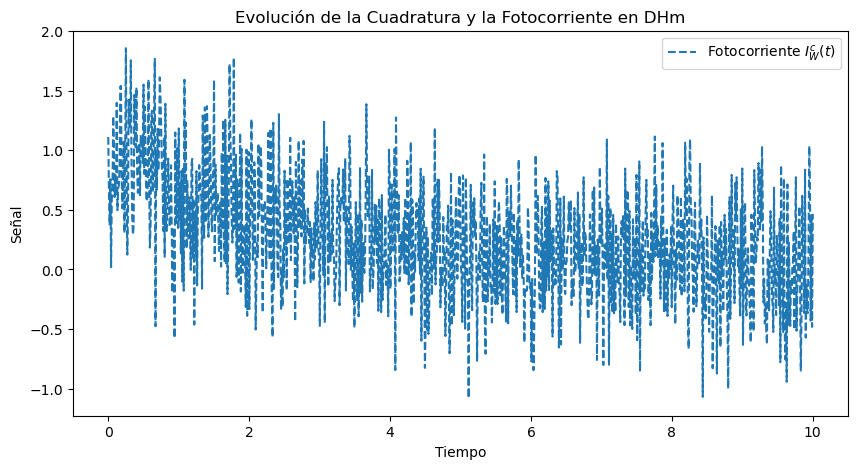

In [123]:
# Graficar la evolución de la cuadratura y la fotocorriente
plt.figure(figsize=(10, 5))

plt.plot(np.linspace(0, t_max, steps), np.real(IWavg), label="Fotocorriente $I_W^c(t)$", linestyle='dashed')
plt.xlabel("Tiempo")
plt.ylabel("Señal")
plt.title("Evolución de la Cuadratura y la Fotocorriente en DHm")
plt.legend()
plt.show()

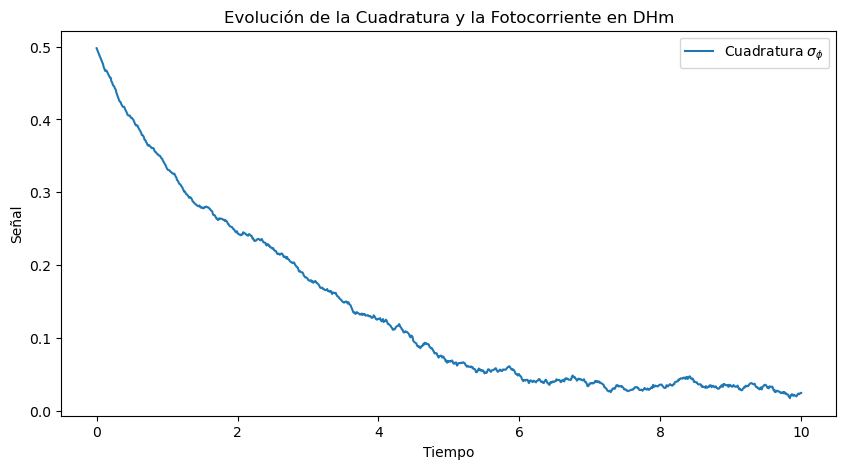

In [124]:
# Graficar la evolución de la cuadratura y la fotocorriente
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, t_max, steps), expect_Xavg, label="Cuadratura $\sigma_\phi$")

plt.xlabel("Tiempo")
plt.ylabel("Señal")
plt.title("Evolución de la Cuadratura y la Fotocorriente en DHm")
plt.legend()
plt.show()

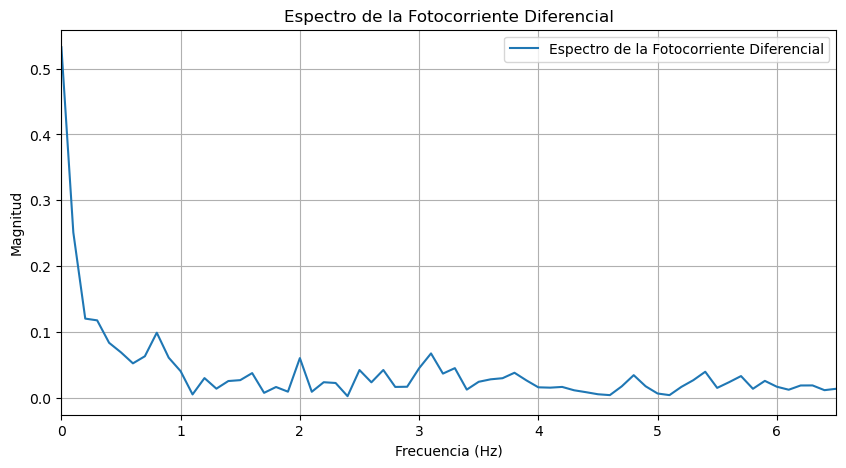

In [125]:
from scipy.fftpack import fft, fftfreq
I_diff=IWavg
# Calcular la FFT de la señal I_diff
N = len(I_diff)  # Número de puntos de la señal
T = dt           # Intervalo de tiempo entre muestras
yf = fft(I_diff)  # Transformada de Fourier
xf = fftfreq(N, T)[:N//2]  # Frecuencias correspondientes (solo la mitad positiva)

# Calcular la magnitud de:l espectro
magnitude = 2.0/N * np.abs(yf[:N//2])

# Graficar el espectro
plt.figure(figsize=(10, 5))
plt.plot(xf, magnitude, label="Espectro de la Fotocorriente Diferencial")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0,6.5)
plt.title("Espectro de la Fotocorriente Diferencial")
plt.grid()
plt.legend()
plt.show()

In [116]:
from scipy.signal import butter, filtfilt

# Diseñar un filtro pasa-altos
def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [117]:
# Frecuencia de corte del filtro pasa-altos
cutoff_freq = 0.25  # Elimina frecuencias por debajo de 1 Hz
fs = 1 / dt  # Frecuencia de muestreo

# Aplicar el filtro pasa-altos
filtered_signal = highpass_filter(IWavg, cutoff_freq, fs)